# Dataset for mosquito collections on Big Pine Key, Florida, USA

In [1]:
import pandas as pd
import numpy as np
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
florida = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/florida_1998_to_2019.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/temperature.csv')

# Temperature

In [3]:
# Remove spaces from column names
temperature.columns = temperature.columns.str.strip()

# Now create the DATE column without spaces in the names
temperature['Date'] = pd.to_datetime(temperature[['YEAR', 'MONTH', 'DAY']], errors='coerce')


In [4]:
temperature

,COOPID,YEAR,MONTH,DAY,meanTemp,Date
0,84570,1998,1,1,62.0,1998-01-01
1,84570,1998,1,2,68.5,1998-01-02
2,84570,1998,1,3,72.5,1998-01-03
3,84570,1998,1,4,74.0,1998-01-04
4,84570,1998,1,5,75.0,1998-01-05
...,...,...,...,...,...,...
4388,84570,2009,12,28,68.0,2009-12-28
4389,84570,2009,12,29,61.0,2009-12-29
4390,84570,2009,12,30,68.0,2009-12-30
4391,84570,2009,12,31,73.0,2009-12-31


In [5]:

# Optionally drop the old columns
temperature = temperature.drop(['YEAR', 'MONTH', 'DAY', 'COOPID'], axis=1)

# Print the updated DataFrame
print(temperature)

      meanTemp       Date
0         62.0 1998-01-01
1         68.5 1998-01-02
2         72.5 1998-01-03
3         74.0 1998-01-04
4         75.0 1998-01-05
...        ...        ...
4388      68.0 2009-12-28
4389      61.0 2009-12-29
4390      68.0 2009-12-30
4391      73.0 2009-12-31
4392      72.0 2010-01-01

[4393 rows x 2 columns]


# Mosquito abundance

In [6]:
florida

,YEAR,DOY,TAEN,DEIN,NIGR,ATRO,QUIN,CRUC,BAHA,INFI,...,ALBI,COND,MULR,PILO,DECL,INOR,GRAB,TITI,UNID,TOTAL
0,1998,232,"1,272.00",76,4,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,354.00"
1,1998,237,"4,792.00",48,24,0,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,008.00"
2,1998,244,"4,000.00",0,0,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00"
3,1998,251,488,0,0,1,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
4,1998,253,"1,324.00",4,0,8,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,336.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2019,56,404,12,0,1,0.0,0,1,0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435
994,2019,64,21,1,0,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
995,2019,70,32,2,0,2,0.0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
996,2019,77,206,4,0,16,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227


In [7]:
florida['TOTAL'] = florida['TOTAL'].str.replace(',', '').astype(float)

# 显示结果验证转换是否正确
print(florida[['YEAR', 'DOY', 'TOTAL']])

     YEAR  DOY   TOTAL
0    1998  232  1354.0
1    1998  237  5008.0
2    1998  244  4000.0
3    1998  251   490.0
4    1998  253  1336.0
..    ...  ...     ...
993  2019   56   435.0
994  2019   64    23.0
995  2019   70    39.0
996  2019   77   227.0
997  2019   85     2.0

[998 rows x 3 columns]


In [8]:
# 定义一个函数将年和天转换为日期
def convert_to_date(row):
    return datetime.datetime(row['YEAR'], 1, 1) + datetime.timedelta(days=row['DOY'] - 1)

# 应用函数转换YEAR和DOY为日期
florida['Date'] = florida.apply(convert_to_date, axis=1)

# 查看转换后的结果
print(florida[['YEAR', 'DOY', 'Date']])

     YEAR  DOY       Date
0    1998  232 1998-08-20
1    1998  237 1998-08-25
2    1998  244 1998-09-01
3    1998  251 1998-09-08
4    1998  253 1998-09-10
..    ...  ...        ...
993  2019   56 2019-02-25
994  2019   64 2019-03-05
995  2019   70 2019-03-11
996  2019   77 2019-03-18
997  2019   85 2019-03-26

[998 rows x 3 columns]


In [9]:
# 选择需要的列
df_selected = florida[['Date', 'TOTAL']]

# 选择合并后的列和TOTAL列
florida = df_selected[['Date', 'TOTAL']]

florida

,Date,TOTAL
0,1998-08-20,1354.0
1,1998-08-25,5008.0
2,1998-09-01,4000.0
3,1998-09-08,490.0
4,1998-09-10,1336.0
...,...,...
993,2019-02-25,435.0
994,2019-03-05,23.0
995,2019-03-11,39.0
996,2019-03-18,227.0


# Merge the data

In [10]:
merged_df = pd.merge(florida, temperature, on='Date', how='inner')


In [11]:
merged_df

,Date,TOTAL,meanTemp
0,1998-08-20,1354.0,85.5
1,1998-08-25,5008.0,85.0
2,1998-09-01,4000.0,86.0
3,1998-09-08,490.0,85.5
4,1998-09-10,1336.0,81.5
...,...,...,...
553,2009-11-23,35.0,79.0
554,2009-11-30,388.0,74.0
555,2009-12-14,59.0,79.0
556,2009-12-21,17.0,60.5


In [12]:
df = merged_df[merged_df['meanTemp'] != -99.9]
df

,Date,TOTAL,meanTemp
0,1998-08-20,1354.0,85.5
1,1998-08-25,5008.0,85.0
2,1998-09-01,4000.0,86.0
3,1998-09-08,490.0,85.5
4,1998-09-10,1336.0,81.5
...,...,...,...
553,2009-11-23,35.0,79.0
554,2009-11-30,388.0,74.0
555,2009-12-14,59.0,79.0
556,2009-12-21,17.0,60.5


In [19]:
df.rename(columns={'TOTAL': 'abundance', 'meanTemp': 'temp'}, inplace=True)

# 查看更新后的DataFrame
df

,Date,abundance,temp
0,1998-08-20,1354.0,85.5
1,1998-08-25,5008.0,85.0
2,1998-09-01,4000.0,86.0
3,1998-09-08,490.0,85.5
4,1998-09-10,1336.0,81.5
...,...,...,...
553,2009-11-23,35.0,79.0
554,2009-11-30,388.0,74.0
555,2009-12-14,59.0,79.0
556,2009-12-21,17.0,60.5


# Plot the data

In [20]:
def plot_total_vs_date(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['abundance'], marker='o', color='b', linestyle='-')
    plt.title('Total vs. Date')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

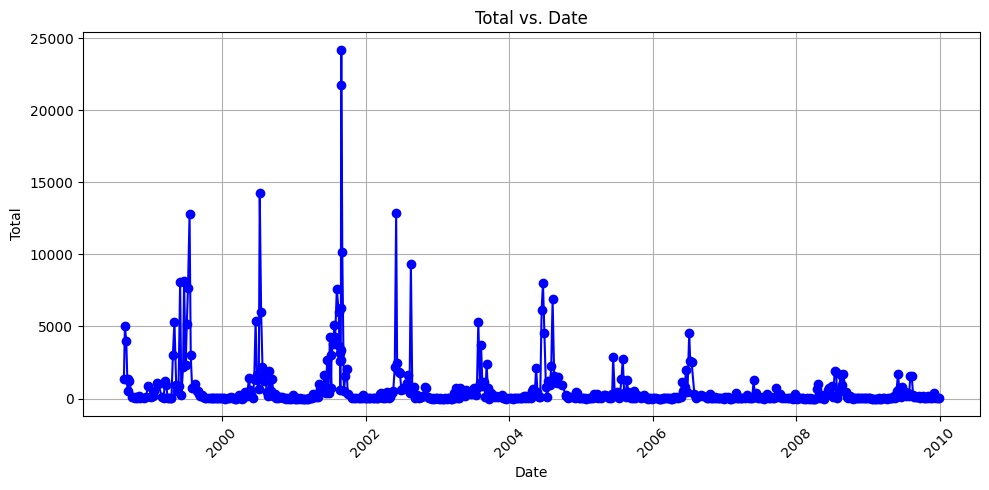

In [21]:
plot_total_vs_date(df)

# Analysis the data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [48]:
def plot_time_series(df):
    plt.figure(figsize=(50, 6))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('abundance', color=color)
    ax1.plot(df.index, df['abundance'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Temperature', color=color)  
    ax2.plot(df.index, df['temp'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

     
    plt.title('Time Series of Total and Temperature')
    plt.show()
def plot_correlation(df):
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
def regression_analysis(df):
    X = df['temp'].values.reshape(-1, 1)  # Predictor
    y = df['abundance'].values  # Response

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title('Temperature vs Total: Linear Regression')
    plt.xlabel('Mean Temperature')
    plt.ylabel('Total')
    plt.show()

    print("Regression Coefficients:", model.coef_)
    print("Regression Intercept:", model.intercept_)

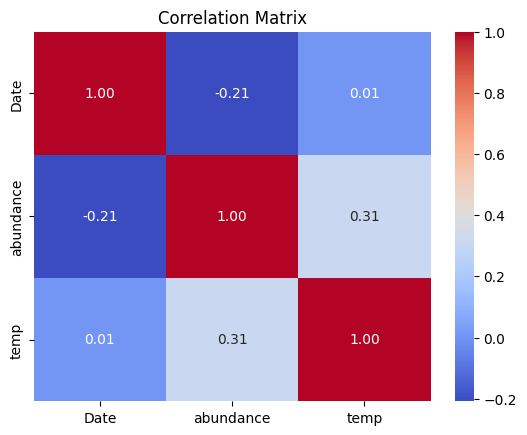

In [42]:
plot_correlation(df)


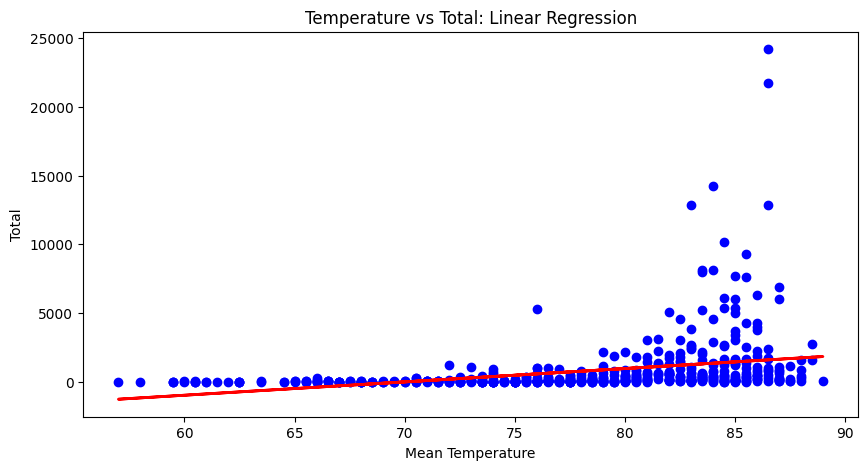

Regression Coefficients: [97.02359807]
Regression Intercept: -6803.98959056306


In [43]:
regression_analysis(df)

# Import the data

In [1]:

df.to_csv('filename.csv', index=False)  # index=False意味着不将行索引写入文件


NameError: name 'df' is not defined